### Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:



From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file readonly/fanwood-webfont.ttf

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

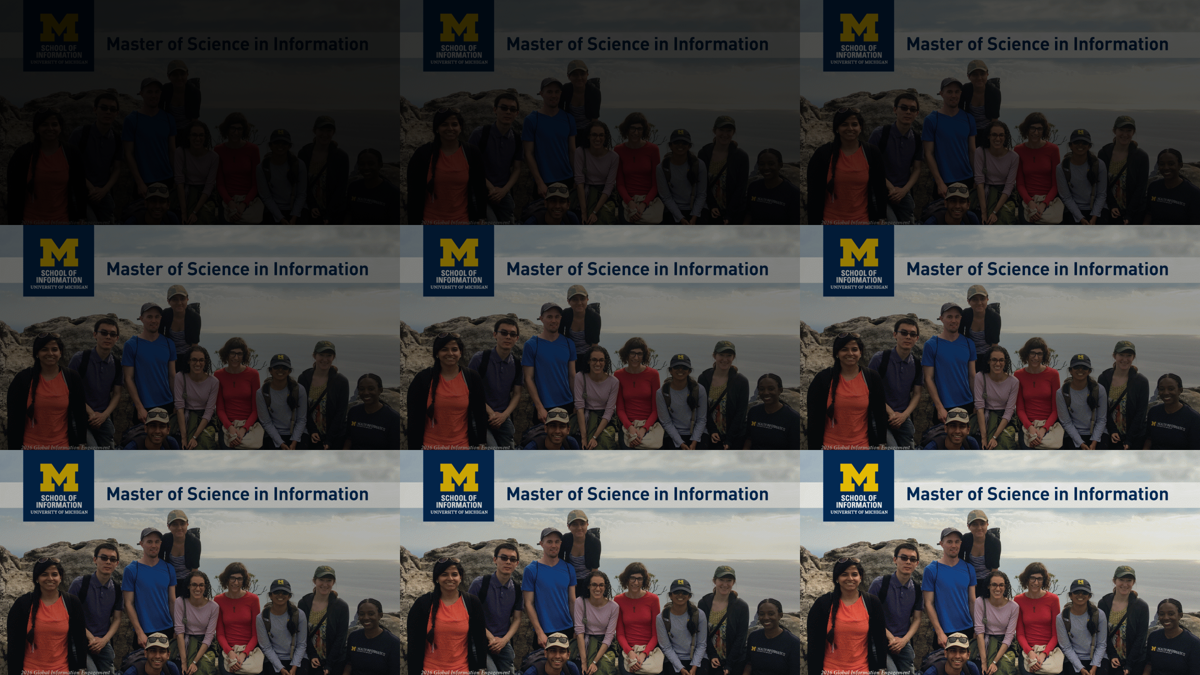

In [1]:
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageColor

# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

### Concatenate Two Image Objects to Create Black Text Third

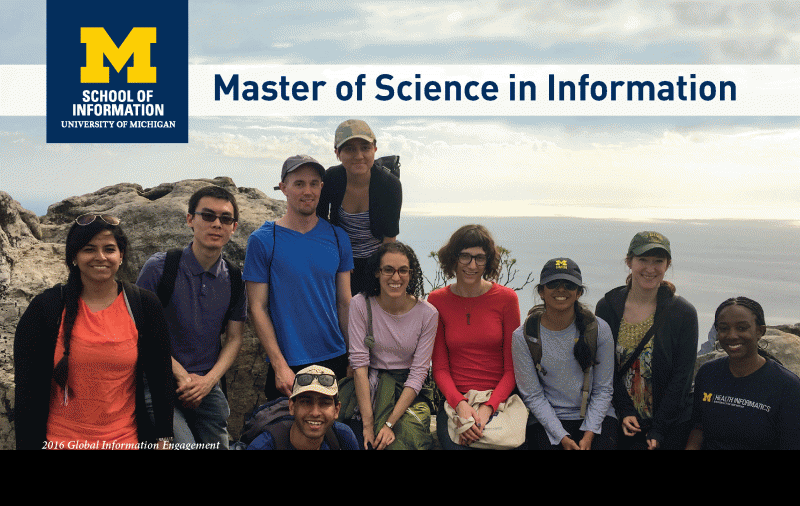

In [2]:
# Concatenate Images for black lower bottom for later text
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="../ReadOnly/msi_recruitment.gif"
image=Image.open(file).convert('RGB')
black_box= Image.new('RGB', (image.width, int(image.height/8)))
concat_image = Image.new('RGB', (image.width, image.height + black_box.height))
concat_image.paste(image, (0, 0))
concat_image.paste(black_box, (0, image.height))


display(concat_image)

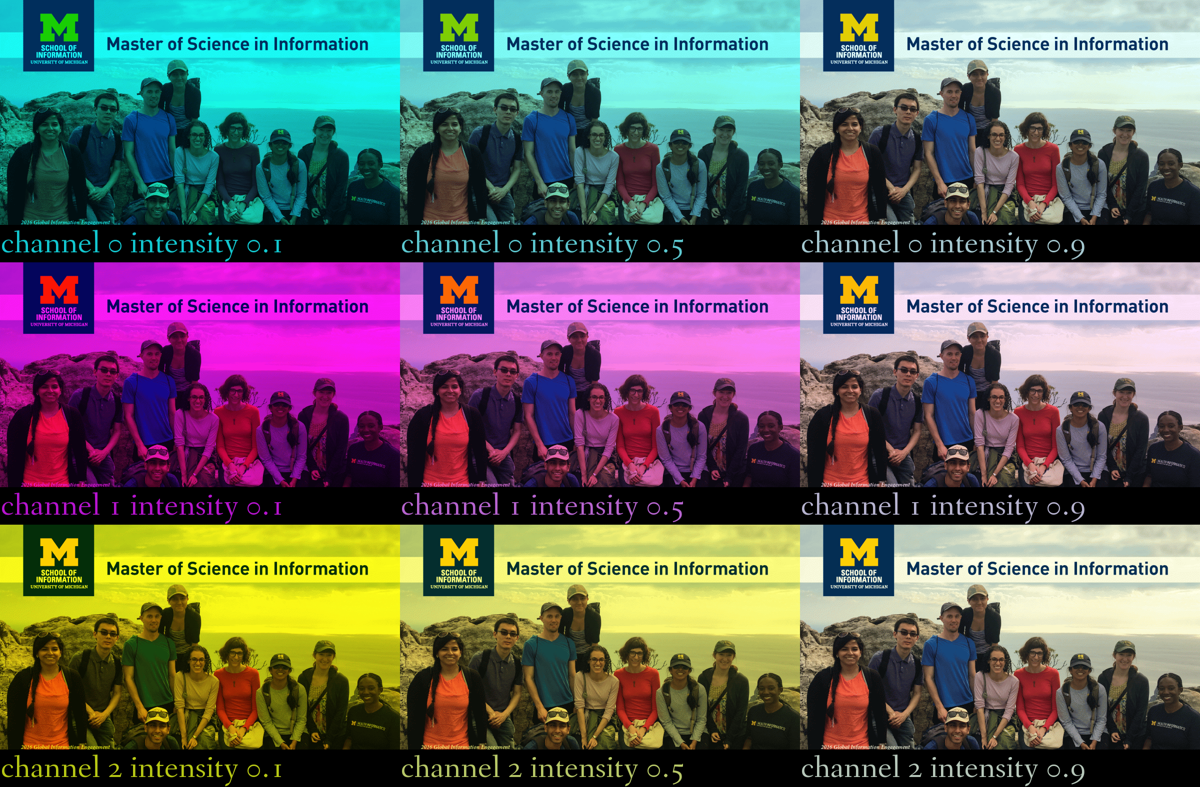

In [3]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}



def black_box_image_combined(img):
    """
    Function
    ----------
    Create a lower black text box for ImageDraw contact (row/column) editing.
    Default black text box is created at same width of received image. Passed image and black text box
    are then paste onto a blank image so as to not lose any details of passed image
    
    Parameters
    ----------
    img (PIL.Image Object) - Obejct will be used for the height and width properties to create text box
    
    Returns
    -------
    Original image with text type box at the bottom. Black Text box spans width of entire image passed 
    
    """
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    # New image set to height of new additive black box height property
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_img.paste(img, (0, 0))
    concat_img.paste(black_box, (0, img.height))
    #display(concat_img)
    return concat_img


def img_text_draw(img, img_dict_i, font='fanwood-webfont.ttf', size=60):
    """
    Function
    ----------
    Take Concatenated image, use dictionary values and l iteratble allow (to access) and assign row and intensity value 
    for rgb mutated image passed.
    
    Parameters
    ---------
    img (PIL.Image) - This image is the image that has had a black text style text box added to it 
    img_dict_i (range iterable index): value passed to associate with text channel and intensity dictionary above
    font (.ttf font argumnet) - Adjustable argument to set a different font within the .text method below
    size (int) - Size argument to pass for .truetype font declaration as well as offset for height in black box to draw
    
    """
    drawn_image = ImageDraw.Draw(img)
    font = ImageFont.truetype(font, size)
    drawn_image.text((2, img.height - size), text='channel {} intensity {}'.format(img_idx_dict[img_dict_i][0], img_idx_dict[img_dict_i][1]),
             font=font, align='left', fill=img.getpixel((0,0)))
    # return img that is drawn on
    return img

for l in range(1, 10):
    # Use default image and add a black box (not cropping as will write in this box)
    concat_image = black_box_image_combined(image)
    # nifty way to use tuple association for the image splitting 
    r, g, b = concat_image.split()
    # use number type index to set image to be added to the array to loop through after for setting contact image
    # https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        images_deux.append(img_text_draw(img,l, size=65))
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        images_deux.append(img_text_draw(img,l, size=65))
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        images_deux.append(img_text_draw(img,l, size=65))
        
        
# Use any image (just chose first) to set width and height properties for new contact sheet to paste into
first_image_2=images_deux[0]
# Create Contact Sheet
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)